# Introduction to Data Mining - Project 2
ID: 1912360

Name: ANCHEARIN

### (문제) /data/boston.csv를 사용하여 아래와 같이 데이터를 탐색하고 요약하시오
**1)-1. 문제**  
데이터 셋에는 총 몇 개의 변수가 있고, 변수들의 이름은 어떻게 되며, 변수별로 결측값이 있는지 확인해보자. 

In [13]:
# code for 1)-1
import pandas as pd
from sklearn.datasets import load_boston
df=pd.read_csv('./Python-Data-Mining-Quick-Start-Guide/data/boston.csv')
# dataset=load_boston()
# df=pd.DataFrame(dataset.data,columns=dataset.feature_names)
df.index.name='record'
print(df.head())

cols=df.columns[1:]
for col in cols:
    print(col,df[col].isnull().values.any())


        record     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
record                                                                        
0            0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1            1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2            2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3            3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4            4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

        TAX  PTRATIO       B  LSTAT  MEDV  
record                                     
0       296     15.3  396.90   4.98  24.0  
1       242     17.8  396.90   9.14  21.6  
2       242     17.8  392.83   4.03  34.7  
3       222     18.7  394.63   2.94  33.4  
4       222     18.7  396.90   5.33  36.2  
CRIM False
ZN False
INDUS False
CHAS False
NOX False
RM False
AGE False
DIS False
RAD False
TAX False
PTRATIO False
B False
LSTAT False
ME

변수에는 ['ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']가 있고, 각가의 변수에는 결측치가 없다

**1)-2. 문제**  
각 변수에 대해서 요약 통계량을 출력하시오.
어떤 변수의 변동이 가장 큰지, 어떤 변수가 치우쳐 있는지 요약 통계량을 바탕으로 설명하고, 치우쳐져 있는 변수 두 개를 선택하여 히스토그램을 나란히 그리고, 어떻게 치우쳐있는지 설명하시오 (변수는 정규화/표준화하지 않아도 된다.)

In [14]:
# code for 1)-2
df.describe()

,record,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,378.750000,3.647422,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


가장 치우쳐저 있는 변수는 TAX와 B

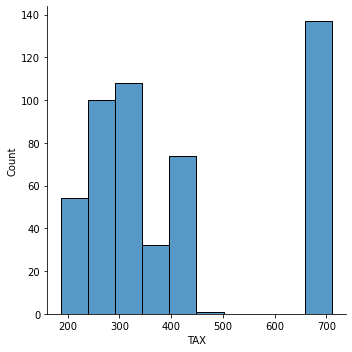

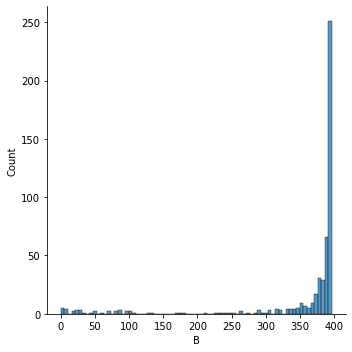

In [15]:
import seaborn as sns

sns.displot(df['TAX'])
sns.displot(df['B'])

**1)-3. 문제**  
모든 변수의 쌍의 상관계수를 구하고, heatmap을 이용하여 상관계수를 시각화하라.  
어떤 쌍이 가장 높은 상관관계를 나타내는지 heatmap을 근거로 찾으시오.

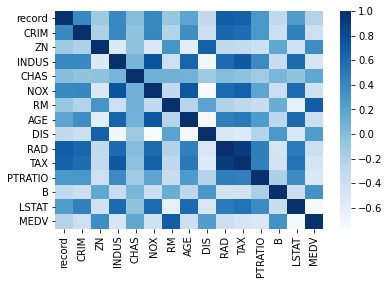

In [16]:
# code for 1)-3
import matplotlib.pyplot as plt
cor=df.corr()

sns.heatmap(cor,annot=False,cmap=plt.cm.Blues)
plt.show()

heatmap에서 RAD와 TAX가 만나는 곳이 색이 가장 진하므로 이 두 변수의 상관계수가 가장 크다는 것을 알 수 있다. 따라서 가장 높은 상관관계를 나타내는 변수의 쌍은 RAD-TAX이다.

**1)-4.문제**  
타깃 변수를 MEDV로 두었을 때, 타깃 변수에 대한 상관계수 값을 구하라.  

In [18]:
# code for 1)-4
cor_target=abs(cor['MEDV'])
print(cor_target)

record     0.226604
CRIM       0.385832
ZN         0.360445
INDUS      0.483725
CHAS       0.175260
NOX        0.427321
RM         0.695360
AGE        0.376955
DIS        0.249929
RAD        0.381626
TAX        0.468536
PTRATIO    0.507787
B          0.333461
LSTAT      0.737663
MEDV       1.000000
Name: MEDV, dtype: float64


**1)-5. 문제**   
상관계수값이 가장 큰 변수를 선택하여 해당 변수와 타깃 변수간의 관계를 시각화하기 위해 스캐터 플롯을 그려보라. 각 변수의 의미와 스캐터 플롯, 그리고 1)-4의 상관계수값을 연관지어 두 변수의 관계를 설명하라. 
(변수의 의미는 https://scikit-learn.org/stable/datasets/toy_dataset.html를 참고)

<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>

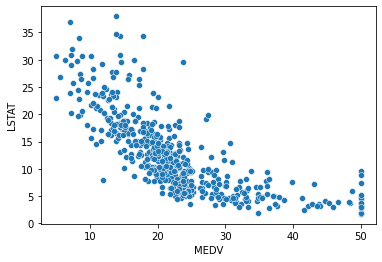

In [23]:
# code for 1)-5
sns.scatterplot(x='MEDV',y='LSTAT',data=df)

LSTAT : % lower status of the population
MEDV : Median value of owner-occupied homes in $1000’s

scatter plot을 보면 LSTAT과 MEDV는 음의 상관관계를 가진다.

LSTAT은 저소득층 주민 비율이고 MEDV는 주택가격이므로 저소득층이 증가하면 해당 지역의 주택가격이 하락하고 저소득층이 감소하면 해당 지역의 주택가격이 증가함을 알 수 있다.